In [63]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.loading import load_video_dataset_local
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
plt.style.use('presentation.mplstyle')
%matplotlib widget
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
analysis_folder = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract"
analysis_folder_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract/"
videos_folder = "/projects/0/einf914/videos/"


In [65]:
refs = {
    "310_20230830": {
        "20230901_Plate310": "20230901_0719_Plate06",
        "20230902_Plate310": "20230902_1343_Plate07",
        "20230903_Plate310": "20230903_1143_Plate07",
        "20230904_Plate310": "20230904_0942_Plate07",
        "20230905_Plate310": "20230905_1345_Plate07",
        # "20230906_Plate310" : "20230906_1220_Plate07",
    },
    "441_20230807": {
        "20230810_Plate441": "20230810_1005_Plate14",
        "20230811_Plate441": "20230811_1605_Plate14",
        "20230812_Plate441": "20230812_1006_Plate14",
        "20230813_Plate441": "20230813_1618_Plate14",
    },
    "449_20230807": {
        "20230813_Plate449": "20230813_1606_Plate10",
        "20230814_Plate449": "20230814_1019_Plate10",
        "20230815_Plate449": "20230815_1021_Plate10",
        "20230816_Plate449": "20230816_1027_Plate10",
        # "20230818_Plate449": "20230818_1107_Plate10",
    },
}

In [89]:
plate_id = "441_20230807"
indexes = refs[plate_id]

In [90]:
all_infos = pd.DataFrame()

for plate_id_video in list(indexes.keys()):
    print(plate_id_video)
    data_obj = load_video_dataset_local(plate_id_video, videos_folder, analysis_folder, analysis_folder_root)
    for index, vid_obj in enumerate(data_obj.video_objs):
        if os.path.exists(vid_obj.edge_adr):
            plt.close("all")
            edge_data_csv = pd.read_csv(vid_obj.edge_adr)
            edge_data_csv['mode'] = vid_obj.dataset['mode']
            edge_data_csv['xpos'] = vid_obj.dataset['xpos']
            edge_data_csv['ypos'] = vid_obj.dataset['ypos']
            edge_data_csv['plate_id'] = vid_obj.dataset['plate_id']
            edge_data_csv['video_int'] = vid_obj.dataset['video_int']
            
            all_infos = pd.concat([all_infos,edge_data_csv])

20230810_Plate441
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\029\Img\edges_data.csv. Check analysis for 20230810_Plate441_029
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\047\Img\edges_data.csv. Check analysis for 20230810_Plate441_047
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\053\Img\edges_data.csv. Check analysis for 20230810_Plate441_053
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\097\Img\edges_data.csv. Check analysis for 20230810_Plate441_097
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230810_Plate441\102\Img\edges_data.csv. Check analysis for 20230810_Plate441_102
20230811_Plate441

(array([1567.,   27.,   45.,   18.,   20.,    0.,    0.,   25.,    0.,
           4.]),
 array([     0.        ,  48877.9105715 ,  97755.82114301, 146633.73171451,
        195511.64228601, 244389.55285751, 293267.46342902, 342145.37400052,
        391023.28457202, 439901.19514352, 488779.10571503]),
 <BarContainer object of 10 artists>)

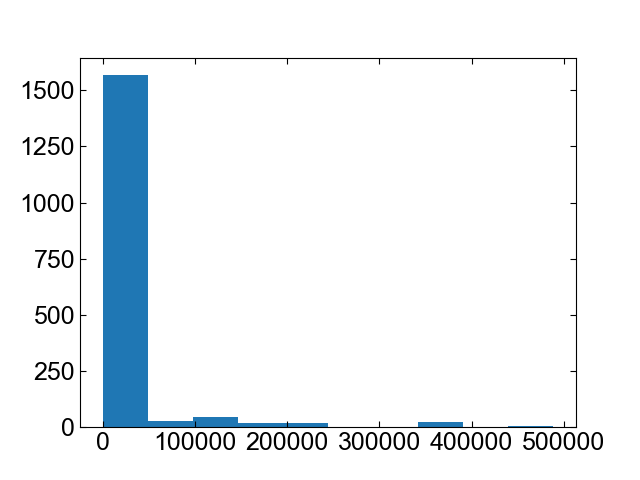

In [91]:
fig,ax = plt.subplots()

ax.hist(all_infos['betweenness_QC'])

In [92]:
all_infos['load'] = all_infos['betweenness_automate']/all_infos['width_automate']**2
all_infos['load2'] = all_infos['betweenness_derivative']/all_infos['width_automate']**2

all_infos['diff_left'] = np.abs(np.abs(all_infos['speed_left']) - 3.15)
all_infos['diff_right'] = np.abs(np.abs(all_infos['speed_right']) - 3.15)

# Assign 'speed_lipid' and 'speed_other' based on which speed is closer to 3.15
all_infos['speed_lipid'] = np.where(all_infos['diff_left'] <= all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other'] = np.where(all_infos['diff_left'] > all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other_abs'] = np.abs(all_infos['speed_other'])
all_infos['speed_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_sub'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_right'], all_infos['speed_left'])
all_infos['speed_sub_abs'] = np.abs(all_infos['speed_sub'])

all_infos['speed_main_abs'] = np.abs(all_infos['speed_main'])
all_infos['coverage_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['coverage_left'], all_infos['coverage_right'])

# Drop the intermediate 'diff_left' and 'diff_right' columns if they are no longer needed
all_infos = all_infos.drop(['diff_left', 'diff_right'], axis=1)

In [93]:
all_infos['aligned'] = -np.sign(all_infos['betweenness_derivative']*all_infos['flux_avg'])
all_infos['aligned2'] = np.sign(all_infos['flux_avg'])

In [94]:
def restructure_df_keep_others(dataf):
    df = dataf.copy()
    abcisse_cols = [col for col in df.columns if col.startswith('abcisse_')]
    abcisse_values = []
    hypha_values = []
    
    for _, row in df.iterrows():
        abcisse_value = -1
        hypha_value = None
        for col in abcisse_cols:
            if row[col] != -1:
                # print(row[col])
                abcisse_value = row[col]
                hypha_value = '_'.join(col.split('_')[1:])
                break
                
        abcisse_values.append(abcisse_value)
        hypha_values.append(hypha_value)
        
    df['abcisse'] = abcisse_values
    df['hypha'] = hypha_values
    df.drop(columns=abcisse_cols, inplace=True)
    
    return df

In [95]:
df = restructure_df_keep_others(all_infos)
column = 'abcisse'

df['hypha'].unique()

array(['1644494_1301708', None, '1316607_1307901'], dtype=object)

In [96]:
df['abcisse_mm'] = df['abcisse']/1000
df['speed_left_abs'] = np.abs(df['speed_left'])

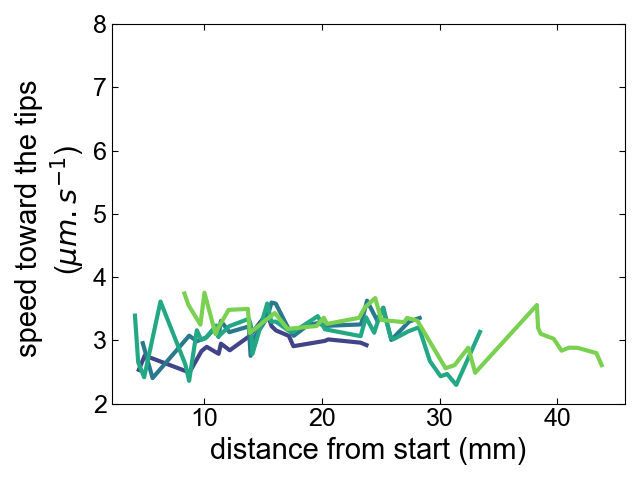

In [74]:
column = 'abcisse_mm'
select = df[df[column]>0]
select = select[select['mode']!="F"]
select = select[select['hypha']=="1644494_1301708"]
select = select[select['coverage_tot']>0.1]
# select = select[select['edge_length']>40]
select = select[select['abcisse']>4000]




fig,ax = plt.subplots()
sns.lineplot(select,x=column,y='speed_right',hue="plate_id",errorbar=None,estimator = min,palette="viridis")
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
ax.set_ylim(2,8)
ax. get_legend().set_visible(False)
plt.tight_layout()


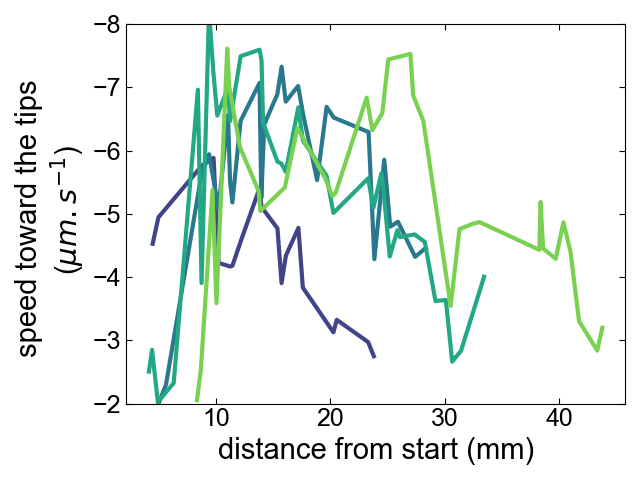

In [77]:
column = 'abcisse_mm'
select = df[df[column]>0]
select = select[select['mode']!="F"]
select = select[select['hypha']=="1644494_1301708"]
select = select[select['coverage_tot']>0.1]
# select = select[select['edge_length']>40]
select = select[select['abcisse']>4000]




fig,ax = plt.subplots()
sns.lineplot(select,x=column,y='speed_left',hue="plate_id",errorbar=None,estimator = min,palette="viridis")
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
ax.set_ylim(-2,-8)
ax. get_legend().set_visible(False)
plt.tight_layout()


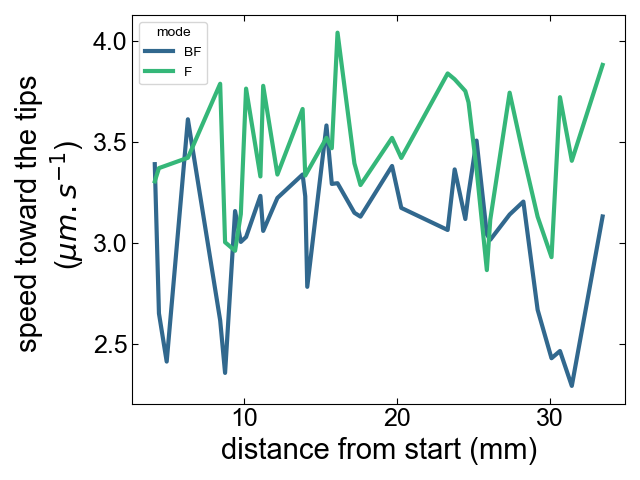

In [75]:
column = 'abcisse_mm'
select = df[df[column]>0]
# select = select[select['mode']=="F"]
select = select[select['hypha']=="1644494_1301708"]
select = select[select['coverage_tot']>0.1*(select['mode']=="F")]
select = select[select['speed_right']<=4.5]
select = select[select['plate_id']=="20230812_Plate441"]

select = select[select['abcisse']>4000]


fig,ax = plt.subplots()
sns.lineplot(select,x=column,y='speed_right',hue="mode",errorbar=None,estimator = min,palette="viridis")
# ax.set_ylim(2,4)
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
# ax. get_legend().set_visible(False)
plt.tight_layout()


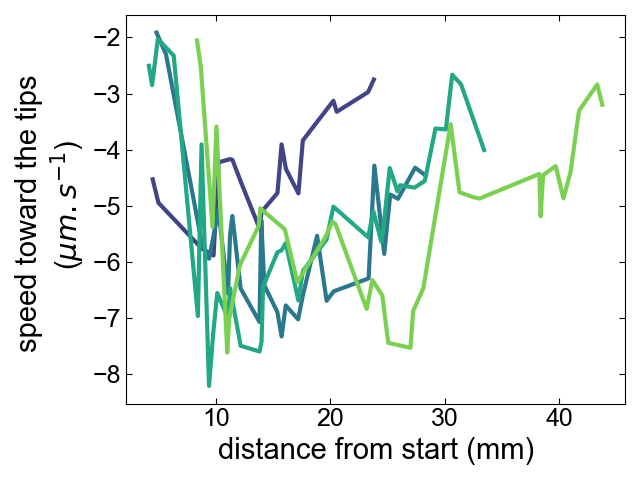

In [80]:
column = 'abcisse_mm'
select = df[df[column]>0]
select = select[select['mode']!="F"]
select = select[select['hypha']=="1644494_1301708"]
select = select[select['coverage_tot']>0.1]
# select = select[select['edge_length']>40]
select = select[select['abcisse']>4000]
fig,ax = plt.subplots()
sns.lineplot(select,x=column,y='speed_left',hue="plate_id",errorbar=None,estimator = min,palette="viridis")
# ax.set_ylim(2,4)
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
ax. get_legend().set_visible(False)
plt.tight_layout()


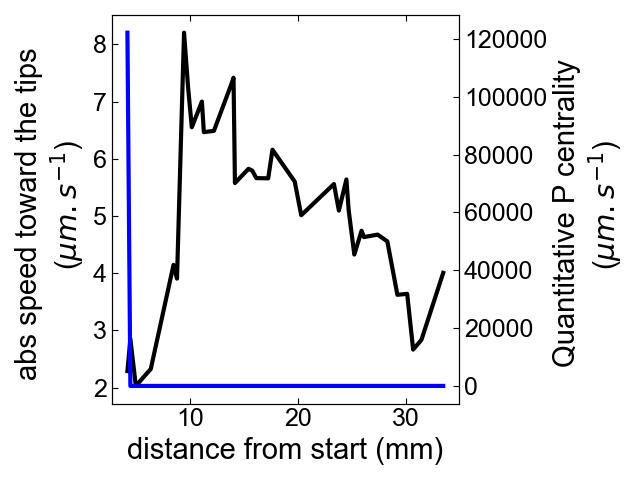

In [99]:
column = 'abcisse_mm'
select = df[df[column]>0]
select = select[select['mode']!="F"]
select = select[select['hypha']=="1644494_1301708"]
select = select[select['coverage_tot']>0.1]
select = select[select['plate_id']=="20230812_Plate441"]
select = select[select['abcisse']>4000]

# select = select[select['edge_length']>40]




fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x=column,y='speed_right',hue="plate_id")
# sns.scatterplot(select,x=column,y='speed_left',hue="plate_id")
sns.lineplot(select,x=column,y='speed_left_abs',errorbar=None,ax=ax,color= "black")
ax3=ax.twinx()

sns.lineplot(select,x=column,y='betweenness_QC',errorbar=None,ax=ax3,color = "blue")
# ax3.set_yscale("log")
# sns.lineplot(select,x=column,y='speed_left',hue="plate_id",errorbar=None,ax = ax2)
# ax2.set_yscale("log")
# ax. get_legend().set_visible(False)
# ax3. get_legend().set_visible(False)
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("abs speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
ax3.set_ylabel("Quantitative P centrality \n ($\mu m.s^{-1}$)") #Not really mm...

plt.tight_layout()

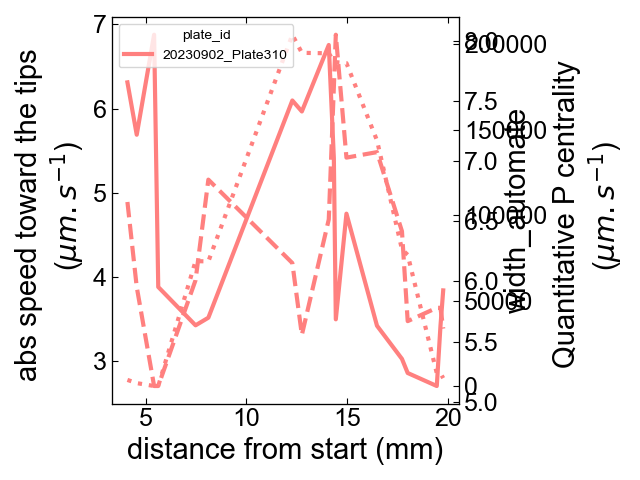

In [61]:
column = 'abcisse_mm'
select = df[df[column]>0]
select = select[select['mode']!="F"]
select = select[select['hypha']=="986611_1016099"]
select = select[select['coverage_tot']>0.1]
select = select[select['plate_id']=="20230902_Plate310"]
select = select[select['abcisse']>4000]

# select = select[select['edge_length']>40]




fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x=column,y='speed_right',hue="plate_id")
# sns.scatterplot(select,x=column,y='speed_left',hue="plate_id")
sns.lineplot(select,x=column,y='speed_left_abs',hue="plate_id",errorbar=None,palette="spring")
ax3=ax.twinx()

sns.lineplot(select,x=column,y='betweenness_QC',hue="plate_id",errorbar=None,ax=ax3,linestyle="dotted",palette="spring")
ax2=ax.twinx()

sns.lineplot(select,x=column,y='width_automate',hue="plate_id",errorbar=None,ax=ax2,linestyle="dashed",palette="spring")

# ax3.set_yscale("log")
# sns.lineplot(select,x=column,y='speed_left',hue="plate_id",errorbar=None,ax = ax2)
# ax2.set_yscale("log")
ax. get_legend().set_visible(False)
ax3. get_legend().set_visible(False)
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("abs speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
ax3.set_ylabel("Quantitative P centrality \n ($\mu m.s^{-1}$)") #Not really mm...

plt.tight_layout()

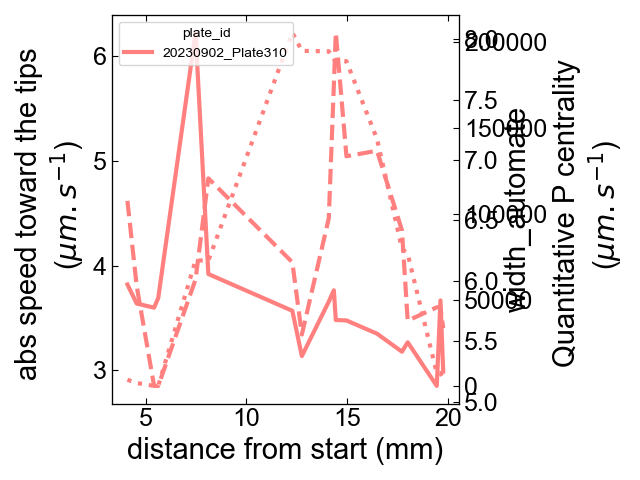

In [62]:
column = 'abcisse_mm'
select = df[df[column]>0]
select = select[select['mode']!="F"]
select = select[select['hypha']=="986611_1016099"]
select = select[select['coverage_tot']>0.1]
select = select[select['plate_id']=="20230902_Plate310"]
select = select[select['abcisse']>4000]

# select = select[select['edge_length']>40]




fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x=column,y='speed_right',hue="plate_id")
# sns.scatterplot(select,x=column,y='speed_left',hue="plate_id")
sns.lineplot(select,x=column,y='speed_right',hue="plate_id",errorbar=None,palette="spring")
ax3=ax.twinx()

sns.lineplot(select,x=column,y='betweenness_QC',hue="plate_id",errorbar=None,ax=ax3,linestyle="dotted",palette="spring")
ax2=ax.twinx()

sns.lineplot(select,x=column,y='width_automate',hue="plate_id",errorbar=None,ax=ax2,linestyle="dashed",palette="spring")

# ax3.set_yscale("log")
# sns.lineplot(select,x=column,y='speed_left',hue="plate_id",errorbar=None,ax = ax2)
# ax2.set_yscale("log")
ax. get_legend().set_visible(False)
ax3. get_legend().set_visible(False)
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("abs speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
ax3.set_ylabel("Quantitative P centrality \n ($\mu m.s^{-1}$)") #Not really mm...

plt.tight_layout()

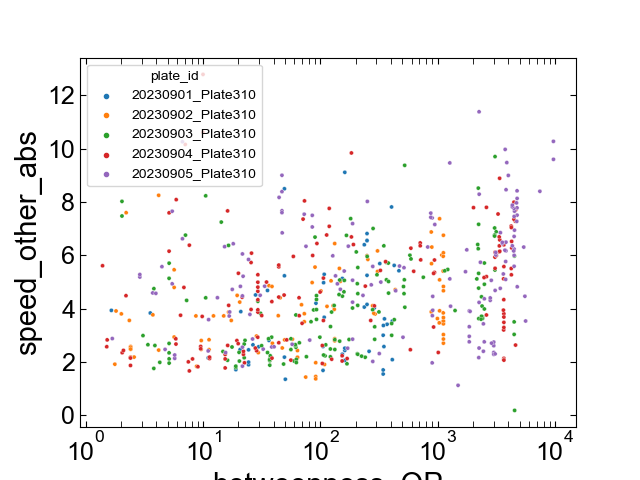

In [66]:
column = 'betweenness_QP'
select = df[df[column]>0]
select = select[select['mode']!="F"]
# select = select[select['hypha']=="1415372_1571210"]
select = select[select['coverage_tot']>0.1]
# select = select[select['plate_id']=="20230811_Plate441"]
# select = select[select['edge_length']>40]




fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x=column,y='speed_right',hue="plate_id")
# sns.scatterplot(select,x=column,y='speed_left',hue="plate_id")
sns.scatterplot(select,x=column,y='speed_other_abs',hue="plate_id")
ax.set_xscale("log")

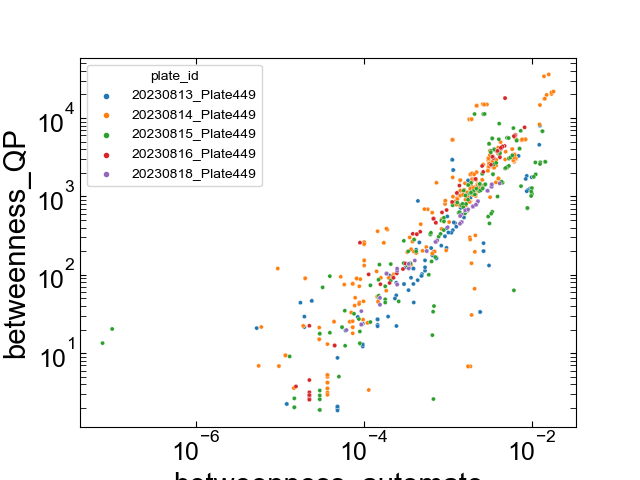

In [48]:
column = 'betweenness_automate'
select = df[df[column]>0]
select = select[select['mode']!="F"]
# select = select[select['hypha']=="1415372_1571210"]
select = select[select['coverage_tot']>0.1]
# select = select[select['plate_id']=="20230811_Plate441"]
# select = select[select['edge_length']>40]




fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x=column,y='speed_right',hue="plate_id")
# sns.scatterplot(select,x=column,y='speed_left',hue="plate_id")
sns.scatterplot(select,x=column,y='betweenness_QP',hue="plate_id")
ax.set_xscale("log")
ax.set_yscale("log")

AttributeError: 'NoneType' object has no attribute 'set_visible'

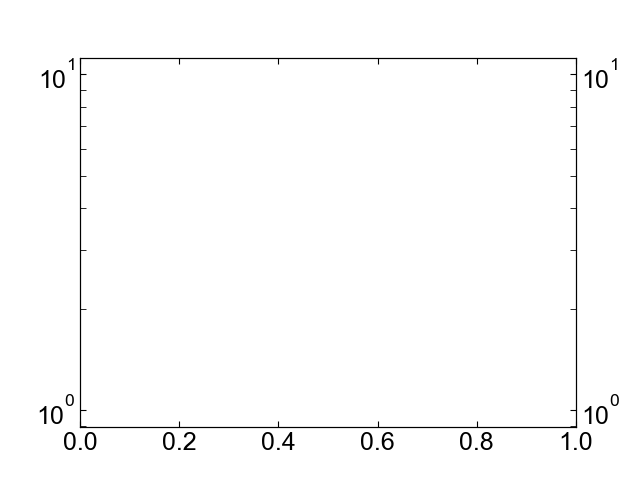

In [45]:
column = 'abcisse'
select = df[df[column]>0]
select = select[select['mode']!="F"]
select = select[select['hypha']=="1644494_1301708"]
select = select[select['coverage_tot']>0.1]
select = select[select['plate_id']=="20230810_Plate441"]
# select = select[select['edge_length']>40]




fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x=column,y='speed_right',hue="plate_id")
# sns.scatterplot(select,x=column,y='speed_left',hue="plate_id")
sns.lineplot(select,x=column,y='betweenness_automate',hue="plate_id",errorbar=None)
# sns.lineplot(select,x=column,y='speed_left',hue="plate_id",errorbar=None)
# for index, row in select.iterrows():
#     if row['plate_id']=="20230813_Plate441":
#         ax.text(row['abcisse'],row['speed_right'],row['video_int'])
# ax2=ax.twinx()
# sns.lineplot(select,x=column,y='width_automate',hue="plate_id",errorbar=None,ax=ax2,linestyle="dashed")
ax.set_yscale("log")

ax3=ax.twinx()

sns.lineplot(select,x=column,y='betweenness_QP',hue="plate_id",errorbar=None,ax=ax3,linestyle="dotted")
ax3.set_yscale("log")
# sns.lineplot(select,x=column,y='speed_left',hue="plate_id",errorbar=None,ax = ax2)
# ax2.set_yscale("log")
ax. get_legend().set_visible(False)
ax3. get_legend().set_visible(False)

In [14]:
for index, row in select.iterrows():
    ax.text(row['abcisse_1316607_1307901'],row['speed_right'],row['video_int'])


KeyError: 'abcisse_1316607_1307901'